In [20]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats


57
600.0
auction_191.csv
slope 0.26829928498280536
intercept 161.96899827874452


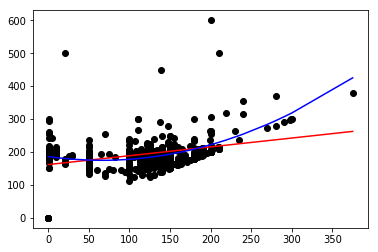

In [33]:
def get_start_end_price():
    prices = np.zeros((2, 385))
    dd = "/Users/Alex/Desktop/coding/6853/raw_tables/"
    for i,auction in enumerate(os.listdir(dd)):
        f = dd + auction
        if i ==57:
            print(auction)
        with open(f,"r") as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            row = next(reader)
            try:
                ending_price = float(row[1][1:])
                starting_price = float(row[3][1:])
                prices[0][i] = starting_price
                prices[1][i] = ending_price
            except:
                pass
    return prices

print (np.argmax(prices[1]))
print(prices[1][57])

prices = get_start_end_price()
slope, intercept, r_value, p_value, std_err = stats.linregress(prices[0],prices[1])
squared_fit = np.polyfit(prices[0],prices[1],2)
print("slope",slope)
print("intercept", intercept)
sort_prices = np.sort(prices[0])
plt.plot(prices[0], prices[1], 'ko')
plt.plot(sort_prices,slope*sort_prices+intercept, "r")
plt.plot(sort_prices,squared_fit[0]*sort_prices*sort_prices + squared_fit[1] * sort_prices + squared_fit[2], "b")
plt.show()


slope 0.22042081271500866
intercept 173.05816247718818


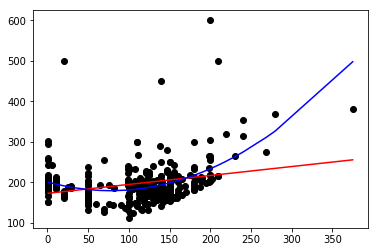

In [28]:
prices_list = []

for i in range(len(prices[0])):
    if prices[0][i] != 0:
        if prices[0][i] != prices[1][i]:
            prices_list.append((prices[0][i], prices[1][i]))

prices2 = np.zeros((2,len(prices_list)))

for i, tup in enumerate(prices_list):
    prices2[0][i] = tup[0]
    prices2[1][i] = tup[1]

    
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(prices2[0],prices2[1])
print("slope",slope2)
print("intercept", intercept2)
squared_fit2 = np.polyfit(prices2[0],prices2[1],2)
sort_prices2 = np.sort(prices2[0])
plt.plot(prices2[0], prices2[1], 'ko')
plt.plot(sort_prices2,slope2*sort_prices2+intercept2, "r")
plt.plot(sort_prices2,squared_fit2[0]*sort_prices2*sort_prices2 + squared_fit2[1] * sort_prices2 + squared_fit2[2], "b")
plt.show()


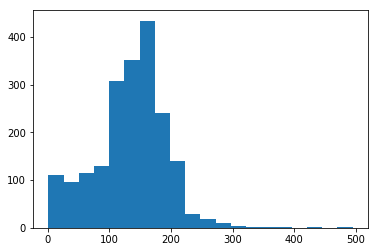

In [54]:

def get_all_bids():
    dd = "/Users/Alex/Desktop/coding/6853/raw_tables/"
    bids_l = []
    for i,auction in enumerate(os.listdir(dd)):
        f = dd + auction
        bids = {}
        with open(f,"r") as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                if not (row[0]) in bids:
                    try:
                        bids[row[0]] = float(row[1][1:])
                    except:
                        pass
                else:
                    try:
                        bid = float(row[1][1:])
                        if bid > bids[row[0]]:
                            bids[row[0]] = bid
                    except:
                        pass
            b = set(bids.values())
            if len(b) == 0:
                continue
            b.remove(max(b))
            for bid in b:
                bids_l.append(bid)
    return bids_l


bids = get_all_bids()



In [59]:

def get_fraction_valid(dd = "/Users/Alex/Desktop/coding/6853/raw_tables/"):
    start_prices = np.zeros(385)
    for i, auction in enumerate(os.listdir(dd)):
        f = dd + auction
        with open(f) as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            row = next(reader)
            try:
                start_prices[i] = float(row[3][1:])
            except:
                pass
    return start_prices

start_prices = get_fraction_valid()
start_prices= start_prices[np.nonzero(start_prices)]
print(len(start_prices))


380


25.515789473684208
17.5
20.631578947368425
11.44507894736842
91.82631578947368
45.39473684210527
13.026315789473683
112.5
113.25
22.405263157894733
126.2578947368421
137.25
141.8421052631579
142.65263157894736
43.71315789473684
44.7
145.0842105263158
45.5921052631579
153.85
49.37368421052632
155.975
159.07894736842104
168.8842105263158
70.81578947368422
33.1578947368421
137.25
145.0842105263158
113.25
63.48684210526316
168.0
125.47368421052632
33.1578947368421
131.13157894736844
34.357894736842105
141.8421052631579
153.85
112.6575
3.2881578947368415
159.07894736842104
80.73421052631579
202.81578947368422
168.0
172.93421052631578
131.13157894736844
133.1184210526316
29.7
33.1578947368421
40.526315789473685
231.73684210526318
158.2236842105263
33.327
33.1578947368421
34.6981052631579
76.94736842105263
190.42105263157893
36.54210526315789
85.71315789473684
11.44507894736842
11.842105263157894
153.85
96.85000000000001
54.45
14.368421052631579
71.36052631578947
80.10789473684211
38.36842105

38.368421052631575
53.368421052631575
57.61578947368421
128.25526315789475
33.1578947368421
5.063157894736842
34.694736842105264
37.625
40.526315789473685
91.19736842105263
2.5776578947368423
57.61578947368421
4.105263157894737
25.25
172.93421052631578
195.795
158.2236842105263
161.2842105263158
84.73684210526315
125.47368421052632
84.73684210526315
131.13157894736844
76.38157894736842
79.16842105263159
84.73684210526315
91.19736842105263
118.28947368421053
80.10789473684211
120.99473684210527
141.8421052631579
128.25526315789475
16.46315789473684
131.13157894736844
16.221052631578946
136.0
18.5
20.631578947368425
11.842105263157894
153.0
22.14473684210526
49.37368421052632
53.368421052631575
115.15263157894736
23.684210526315788
57.61578947368421
22.66578947368421


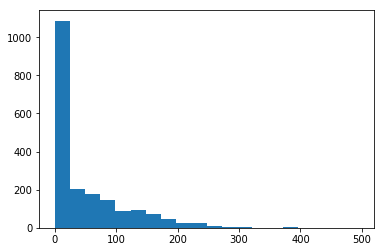

In [62]:
bids = np.array(bids)

#### Incorrect ignore

for i,bid in enumerate(bids):
    factor = np.sum(np.greater_equal(bid,start_prices))/len(start_prices)
    bids[i] = factor*bid




plt.hist(bids, bins = 20)
plt.show()